In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
import json

In [168]:
# Merge dataframes for the experiments into one (vertically)
humans_df = pd.read_csv('./outputs/metrics_experiment1.csv')
metrics = humans_df['metric']
print(set(metrics))

developers_df = pd.read_csv('./outputs/metrics_experiment2.csv')
developers_df['who'] = 'tool_retrieve_rank'

developersc_df = pd.read_csv('./outputs/metrics_experiment2c.csv')
developersc_df['who'] = 'tool_retrieve_only'

developersb_df = pd.read_csv('./outputs/metrics_experiment2b.csv')
developersb_df['who'] = 'tool_retrieve_rank_explain'

gpt_df = pd.read_csv('./outputs/metrics_experiment3.csv')

cohere_df = pd.read_csv('./outputs/metrics_experiment3a.csv')
cohere_df['who'] = 'cohere_zeroshot'

llama2_df = pd.read_csv('./outputs/metrics_experiment3b.csv')
llama2_df['who'] = 'llama2_zeroshot'

gptrag_df = pd.read_csv('./outputs/metrics_experiment4.csv')
gptrag_df['who'] = 'gpt_rag'

cohererag_df = pd.read_csv('./outputs/metrics_experiment4a.csv')
cohererag_df['who'] = 'cohere_rag'

llama2rag_df = pd.read_csv('./outputs/metrics_experiment4b.csv')
llama2rag_df['who'] = 'llama2_rag'

#list_of_dfs = [humans_df, developers_df, developersa_df, gpt_df, gptrag_df]
list_of_dfs = [humans_df, developers_df, gpt_df, gptrag_df, cohere_df, cohererag_df, llama2_df, llama2rag_df, developersc_df]
allmetrics_df = pd.concat(list_of_dfs, axis=0)
print(set(allmetrics_df['who']))
print(allmetrics_df.shape)
allmetrics_df.sample(20)

{'recall@5', 'f1@5', 'recall@7', 'precision@5', 'ndcg@3', 'mrr@5', 'recall@3', 'mrr@7', 'ndcg@5', 'f1@7', 'ndcg@7', 'mrr@3', 'precision@7', 'map@7', 'f1@3', 'map@3', 'map@5', 'precision@3'}
{'humans', 'cohere_rag', 'llama2_rag', 'tool_retrieve_only', 'gpt_rag', 'llama2_zeroshot', 'gpt_zeroshot', 'tool_retrieve_rank', 'cohere_zeroshot'}
(3258, 4)


,query,metric,value,who
89,credit card validation,f1@7,0.000000,llama2_rag
242,scraper,ndcg@5,1.000000,tool_retrieve_only
273,mathematical functions,precision@3,1.000000,humans
46,check valid email address,recall@5,0.054545,tool_retrieve_rank
34,captcha authentication,recall@7,0.500000,cohere_rag
384,third party authentication,map@5,0.000000,cohere_zeroshot
97,download free music,mrr@5,0.500000,llama2_rag
291,translate english to spanish,precision@3,0.000000,cohere_rag
322,rank aggregation algorithms,recall@7,0.000000,llama2_zeroshot
166,extract barcode from image,recall@3,0.062500,tool_retrieve_only


In [169]:
# Alternative view of metric values for each query
allmetrics_df.groupby(by=['query','metric','who'])[['value']].mean().reset_index().pivot(index=['query','who'],columns='metric')

value                      \
metric                                         f1@3      f1@5      f1@7   
query                  who                                                
DOM manipulation utils cohere_rag          0.300000  0.363636  0.500000   
                       cohere_zeroshot     0.100000  0.090909  0.083333   
                       gpt_rag             0.300000  0.272727  0.250000   
                       gpt_zeroshot        0.000000  0.000000  0.000000   
                       humans              0.200000  0.272727  0.250000   
...                                             ...       ...       ...   
user authentication    humans              0.027972  0.055172  0.054422   
                       llama2_rag          0.027972  0.055172  0.068027   
                       llama2_zeroshot     0.013986  0.013793  0.013605   
                       tool_retrieve_only  0.027972  0.055172  0.068027   
                       tool_retrieve_rank  0.027972  0.055172  0.068027   

                                                                               \
metric                                        map@3     map@5     map@7 mrr@3   
query                  who                                                      
DOM manipulation utils cohere_rag          0.176471  0.235294  0.334734   1.0   
                       cohere_zeroshot     0.058824  0.058824  0.058824   1.0   
                       gpt_rag             0.176471  0.176471  0.176471   1.0   
                       gpt_zeroshot        0.000000  0.000000  0.000000   0.0   
                       humans              0.117647  0.152941  0.152941   1.0   
...                                             ...       ...       ...   ...   
user authentication    humans              0.011905  0.022976  0.022976   1.0   
                       llama2_rag          0.014286  0.025357  0.031310   1.0   
                       llama2_zeroshot     0.007143  0.007143  0.007143   1.0   
                       tool_retrieve_only  0.014286  0.025357  0.031310   1.0   
                       tool_retrieve_rank  0.014286  0.025357  0.031310   1.0   

                                                                           \
metric                                    mrr@5 mrr@7    ndcg@3    ndcg@5   
query                  who                                                  
DOM manipulation utils cohere_rag           1.0   1.0  1.000000  0.868795   
                       cohere_zeroshot      1.0   1.0  0.469279  0.339160   
                       gpt_rag              1.0   1.0  1.000000  0.722727   
                       gpt_zeroshot         0.0   0.0  0.000000  0.000000   
                       humans               1.0   1.0  0.765361  0.684352   
...                                         ...   ...       ...       ...   
user authentication    humans               1.0   1.0  0.703918  0.786014   
                       llama2_rag           1.0   1.0  0.765361  0.830420   
                       llama2_zeroshot      1.0   1.0  0.469279  0.339160   
                       tool_retrieve_only   1.0   1.0  0.765361  0.830420   
                       tool_retrieve_rank   1.0   1.0  0.765361  0.830420   

                                                                             \
metric                                       ndcg@7 precision@3 precision@5   
query                  who                                                    
DOM manipulation utils cohere_rag          0.893663    1.000000         0.8   
                       cohere_zeroshot     0.274876    0.333333         0.2   
                       gpt_rag             0.585742    1.000000         0.6   
                       gpt_zeroshot        0.000000    0.000000         0.0   
                       humans              0.554641    0.666667         0.6   
...                                             ...         ...         ...   
user authentication    humans              0.637034    0.666667       

In [170]:
def get_boxplot_queries(df,metric,hue=False): # editar para meter otro de los rankings
    sns.set(rc={'figure.figsize':(8,5)})

    if hue:
        g = sns.boxplot(data=df[(df['metric'] == metric) & (df['who'] != 'gpt')], x="query", y="value",hue='who')
    else:
        g = sns.boxplot(data=df[(df['metric'] == metric) & (df['who'] != 'gpt')], x="query", y="value")
        sns.regplot(data=df[(df['metric'] == metric) & (df['who'] == 'tool')], x='query', y='value', scatter=True, fit_reg=False, marker='o',
                scatter_kws={"s": 50, 'color':'green'})

    sns.regplot(data=df[(df['metric'] == metric) & (df['who'] == 'gpt')], x='query', y='value', scatter=True, fit_reg=False, marker='o',
                scatter_kws={"s": 50, 'color':'blue'})
    _ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

    return g

In [171]:
#get_boxplot_queries(allmetrics_df,'map@5',hue=True)
#plt.show()

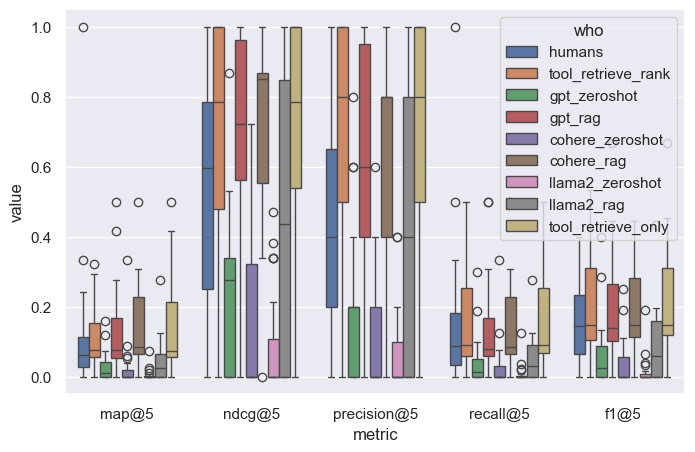

In [172]:
sns.set(rc={'figure.figsize':(8,5)})

# to_select = ['map@5','ndcg@5', 'mmr@5']
# to_select = ['precision@5','recall@5','f1@5']
k = str(5)
to_select = ['map@'+k,'ndcg@'+k, 'mmr@'+k, 'precision@'+k,'recall@'+k,'f1@'+k]

sns.boxplot(data=allmetrics_df[allmetrics_df['metric'].isin(to_select)], x="metric", y="value",hue='who')
plt.show()

In [173]:
def set_box_color(bp,color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    plt.setp(bp['means'], color=color)
    plt.setp(bp['fliers'], color=color)

# box_width = 0.4
# whis_ = (0,99)
# whis_ = 1.5

# fig = plt.figure()
# ax = fig.gca()
# for axis in ['top','bottom','left','right']:
#     ax.spines[axis].set_linewidth(1.5)

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.50

def plot_metrics(df, metrics, filename=None, box_width=0.4, whis_=1.5):
    plt.figure(figsize=(10,5))
    ax = plt.axes()
    ax.set_facecolor("white")
    for spine in ax.spines.values():
        spine.set_edgecolor("black")
    flierprops = {'marker': 'o', 'markersize': 2, 'markerfacecolor': 'black'}

    if len(metrics) > 0:
        bph = plt.boxplot(df[(df['metric'] == metrics[0]) & (df['who'] == 'humans')]['value'],positions=[1], widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bph,'#D7191C')
        bhg = plt.boxplot(df[(df['metric'] == metrics[0]) & (df['who'] == 'tool_retrieve_rank')]['value'],positions=[1.5],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bhg,'#49B79F')
        bht = plt.boxplot(df[(df['metric'] == metrics[0]) & (df['who'] == 'gpt_zeroshot')]['value'],positions=[2],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bht,'#2C7BB6')
        rag = plt.boxplot(df[(df['metric'] == metrics[0]) & (df['who'] == 'gpt_rag')]['value'],positions=[2.5],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(rag,'#00008B')
        bht = plt.boxplot(df[(df['metric'] == metrics[0]) & (df['who'] == 'cohere_zeroshot')]['value'],positions=[3],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bht,'#FFA500')
        rag = plt.boxplot(df[(df['metric'] == metrics[0]) & (df['who'] == 'cohere_rag')]['value'],positions=[3.5],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(rag,'#A0522D')
        bht = plt.boxplot(df[(df['metric'] == metrics[0]) & (df['who'] == 'llama2_zeroshot')]['value'],positions=[4],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bht,'#DA70D6')
        rag = plt.boxplot(df[(df['metric'] == metrics[0]) & (df['who'] == 'llama2_rag')]['value'],positions=[4.5],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(rag,'#7E1E9C')

    if len(metrics) > 1:
        bph = plt.boxplot(df[(df['metric'] == metrics[1]) & (df['who'] == 'humans')]['value'],positions=[5.5],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bph,'#D7191C')
        bhg = plt.boxplot(df[(df['metric'] == metrics[1]) & (df['who'] == 'tool_retrieve_rank')]['value'],positions=[6],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bhg,'#49B79F')
        bht = plt.boxplot(df[(df['metric'] == metrics[1]) & (df['who'] == 'gpt_zeroshot')]['value'],positions=[6.5],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bht,'#2C7BB6')
        rag = plt.boxplot(df[(df['metric'] == metrics[1]) & (df['who'] == 'gpt_rag')]['value'],positions=[7],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(rag,'#00008B')
        bht = plt.boxplot(df[(df['metric'] == metrics[1]) & (df['who'] == 'cohere_zeroshot')]['value'],positions=[7.5],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bht,'#FFA500')
        rag = plt.boxplot(df[(df['metric'] == metrics[1]) & (df['who'] == 'cohere_rag')]['value'],positions=[8],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(rag,'#A0522D')
        bht = plt.boxplot(df[(df['metric'] == metrics[1]) & (df['who'] == 'llama2_zeroshot')]['value'],positions=[8.5],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bht,'#DA70D6')
        rag = plt.boxplot(df[(df['metric'] == metrics[1]) & (df['who'] == 'llama2_rag')]['value'],positions=[9],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(rag,'#7E1E9C')

    if len(metrics) > 2:
        bph = plt.boxplot(df[(df['metric'] == metrics[2]) & (df['who'] == 'humans')]['value'],positions=[10],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bph,'#D7191C')
        bhg = plt.boxplot(df[(df['metric'] == metrics[2]) & (df['who'] == 'tool_retrieve_rank')]['value'],positions=[10.5],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bhg,'#49B79F')
        bht = plt.boxplot(df[(df['metric'] == metrics[2]) & (df['who'] == 'gpt_zeroshot')]['value'],positions=[11],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bht,'#2C7BB6')
        rag = plt.boxplot(df[(df['metric'] == metrics[2]) & (df['who'] == 'gpt_rag')]['value'],positions=[11.5],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(rag,'#00008B')
        bht = plt.boxplot(df[(df['metric'] == metrics[2]) & (df['who'] == 'cohere_zeroshot')]['value'],positions=[12],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bht,'#FFA500')
        rag = plt.boxplot(df[(df['metric'] == metrics[2]) & (df['who'] == 'cohere_rag')]['value'],positions=[12.5],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(rag,'#A0522D')
        bht = plt.boxplot(df[(df['metric'] == metrics[2]) & (df['who'] == 'llama2_zeroshot')]['value'],positions=[13],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(bht,'#DA70D6')
        rag = plt.boxplot(df[(df['metric'] == metrics[2]) & (df['who'] == 'llama2_rag')]['value'],positions=[13.5],widths=(box_width), whis=whis_,flierprops=flierprops)
        set_box_color(rag,'#7E1E9C')

    #TICKS = ['precision@5','recall@5','f-measure@5']
    if len(metrics) < 3:
        plt.xticks([3,7.5], metrics)
    else:
        plt.xticks([3,7.5,12], metrics)

    plt.plot([], c='#D7191C', label='JS Developers')
    plt.plot([], c='#49B79F', label='AIDT')
    plt.plot([], c='#2C7BB6', label='Search - OpenAI-GPT3.5')
    plt.plot([], c='#00008B', label='RAG - OpenAI-GPT3.5')
    plt.plot([], c='#FFA500', label='Search - Cohere-Coral')
    plt.plot([], c='#A0522D', label='RAG - Cohere-Coral')
    plt.plot([], c='#DA70D6', label='Search - Llama2-7B-chat')
    plt.plot([], c='#7E1E9C', label='RAG - Llama2-7B-chat')
    plt.legend(facecolor='white', framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5)).get_frame().set_linewidth(0)

    plt.tight_layout()

    if filename is not None:
        plt.savefig(filename,dpi=600)

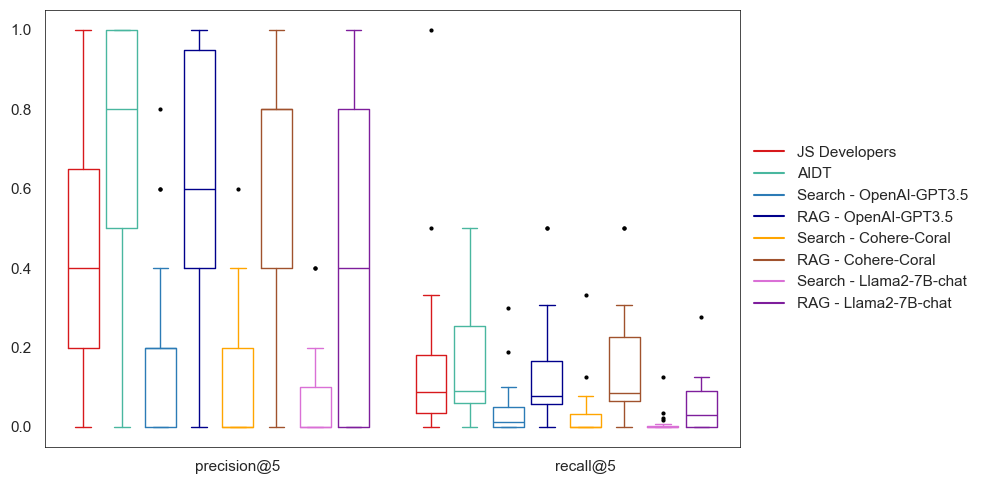

In [174]:
plot_metrics(allmetrics_df, metrics=['precision@5','recall@5'], filename='precision_recall_all.pdf') #, 'f1@5'])

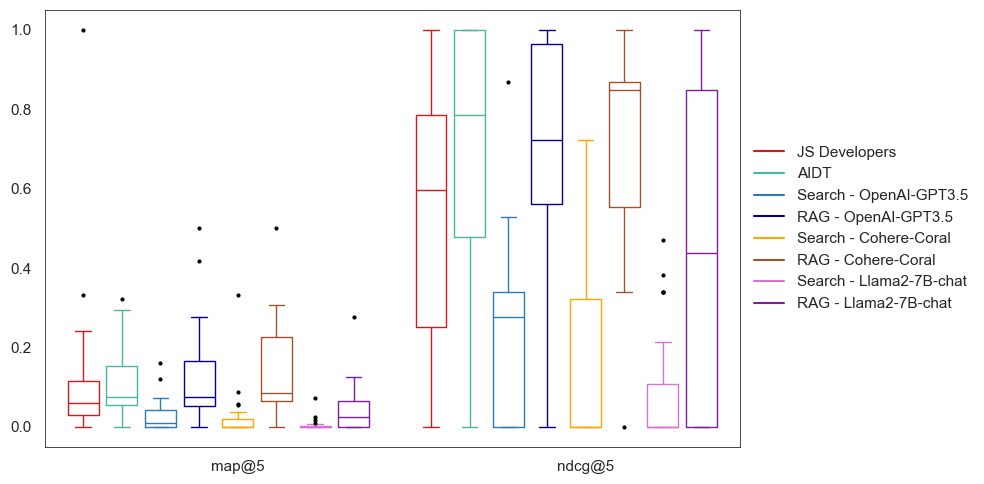

In [175]:
plot_metrics(allmetrics_df, metrics=['map@5','ndcg@5'], filename='map_ndcg_all.pdf')

In [176]:
import scipy
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon

from statistics import mean, stdev
from math import sqrt

def cohens_d(c0,c1):
    den = sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2)
    if den == 0:
        return '-'
    cohens_d = abs((mean(c0) - mean(c1)) / den)
    if cohens_d < 0.1:
        return 'negligible'
    if cohens_d < 0.35:
        return 'small' 
    if cohens_d < 0.65:
        return 'medium'
    return 'large'

def paired_analysis(f1,f2,alpha=0.01): # only one df is needed, then is for i for j
            
    normal = False
    try:
         if scipy.stats.normaltest(f1,nan_policy='omit').pvalue < alpha and scipy.stats.normaltest(f2,nan_policy='omit').pvalue < alpha:
                normal = True
    except:
        pass
    if not normal:
        statsb = wilcoxon(f1,f2,alternative='two-sided',zero_method='zsplit')
        statsg = wilcoxon(f1,f2,alternative='greater',zero_method='zsplit')
        statsl = wilcoxon(f1,f2,alternative='less',zero_method='zsplit')
        return (statsb.pvalue,statsg.pvalue,statsl.pvalue,cohens_d(f1,f2))
    else: # both normal
        statsb = scipy.stats.ttest_rel(f1,f2,nan_policy='omit') 
#         print(statsb)
        return (statsb.statistic,statsb.pvalue,cohens_d(f1,f2))

    return differents  

In [177]:
def select_columns(df, metric, whos):
    series_list = []
    for w in whos:
        s = df[(df['metric'] == metric) & (df['who'] == w)]['value'].copy()
        s.reset_index(drop=True, inplace=True)
        series_list.append(s)

    result_df = pd.concat(series_list, axis=1)
    result_df.dropna(inplace=True)
    result_df.columns = whos
    return result_df

# m = 'precision@5'
# s1 = allmetrics_df[(allmetrics_df['metric'] == m) & (allmetrics_df['who'] == 'humans')]['value'].copy()
# print(type(s1))
# s1

In [195]:
def check_statistical_significance(df, col1, col2, alpha=0.05, correction=False):
    if correction:
        alpha_corrected = alpha / 3.0
    else:
        alpha_corrected = alpha

    stats = paired_analysis(df[col1], df[col2], alpha=alpha_corrected)

    if len(stats) < 4: # normal -- tiene que dividir y chequear para ver cual queremos rejectear
        test_result = stats[2] if stats[1]/2 < alpha_corrected and stats[0] > 0 else '-'
    else:
        test_result = stats[3] if stats[1] < alpha_corrected else '-'
    return test_result, stats

In [211]:
whos=['humans', 'tool_retrieve_rank', 'gpt_rag', 'cohere_rag', 'llama2_rag']
pairs_df = select_columns(allmetrics_df, metric='map@5', whos=whos)

check_statistical_significance(pairs_df, col1='tool_retrieve_rank', col2='humans')

/Users/adiazpace/opt/anaconda3/envs/aidt_gpt/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


('-', (0.18146514892578125, 0.09073257446289062, 0.9163246154785156, 'small'))

<Axes: >

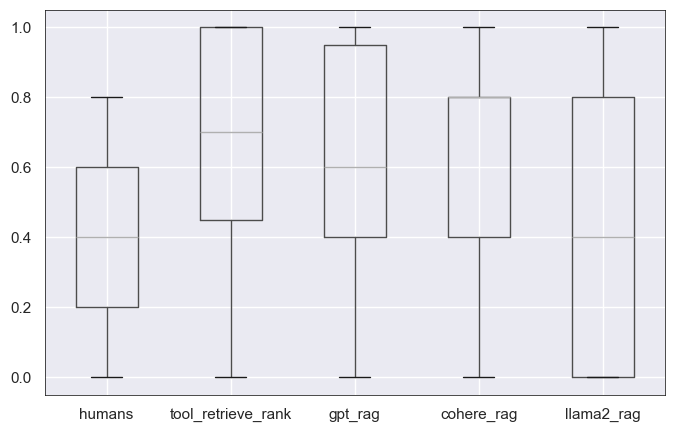

In [179]:
pairs_df.boxplot()